In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
test_y_gender=pd.read_csv('gender_submission.csv')

### Data  analysis and cleaning of train_data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

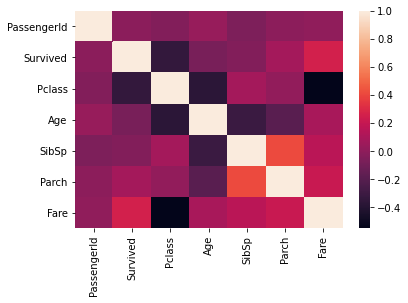

In [7]:
sns.heatmap(train_data.corr())

### Visulising the data w.r.t. Sex

As we know from movie first priority is given to female so lets visulize the data 

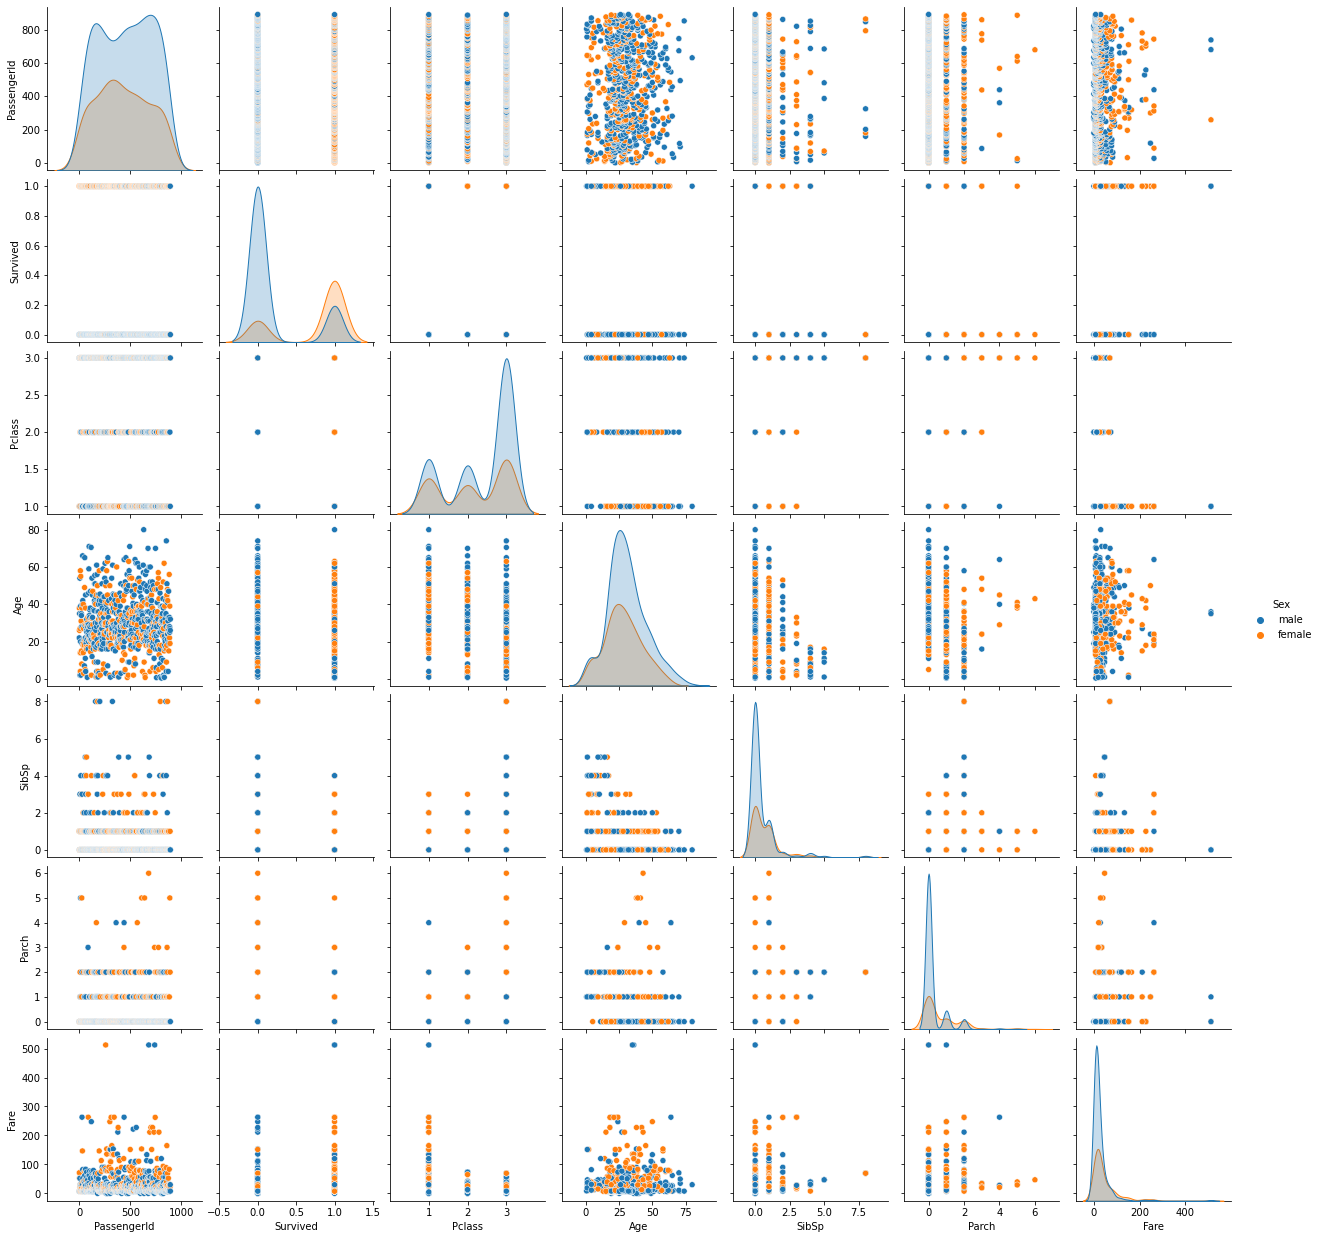

In [8]:
sns.pairplot(train_data,hue='Sex')

In [9]:
women=train_data.loc[train_data.Sex=='female']['Survived']
survived_women=sum(women)/len(women)
men=train_data.loc[train_data.Sex=='male']['Survived']
survived_men=sum(men)/len(men)
print('Survival rate of female is :', survived_women*100,'%')
print('Survival rate of male is :', survived_men*100,'%')

Survival rate of female is : 74.20382165605095 %
Survival rate of male is : 18.890814558058924 %


<AxesSubplot:xlabel='Survived', ylabel='count'>

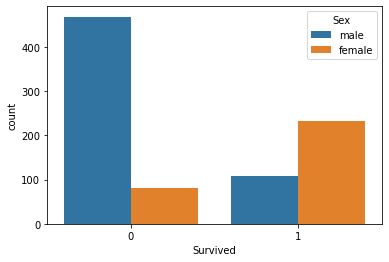

In [10]:
sns.countplot(x='Survived',data=train_data,hue='Sex')

### Visulising data w.r.t Pclass

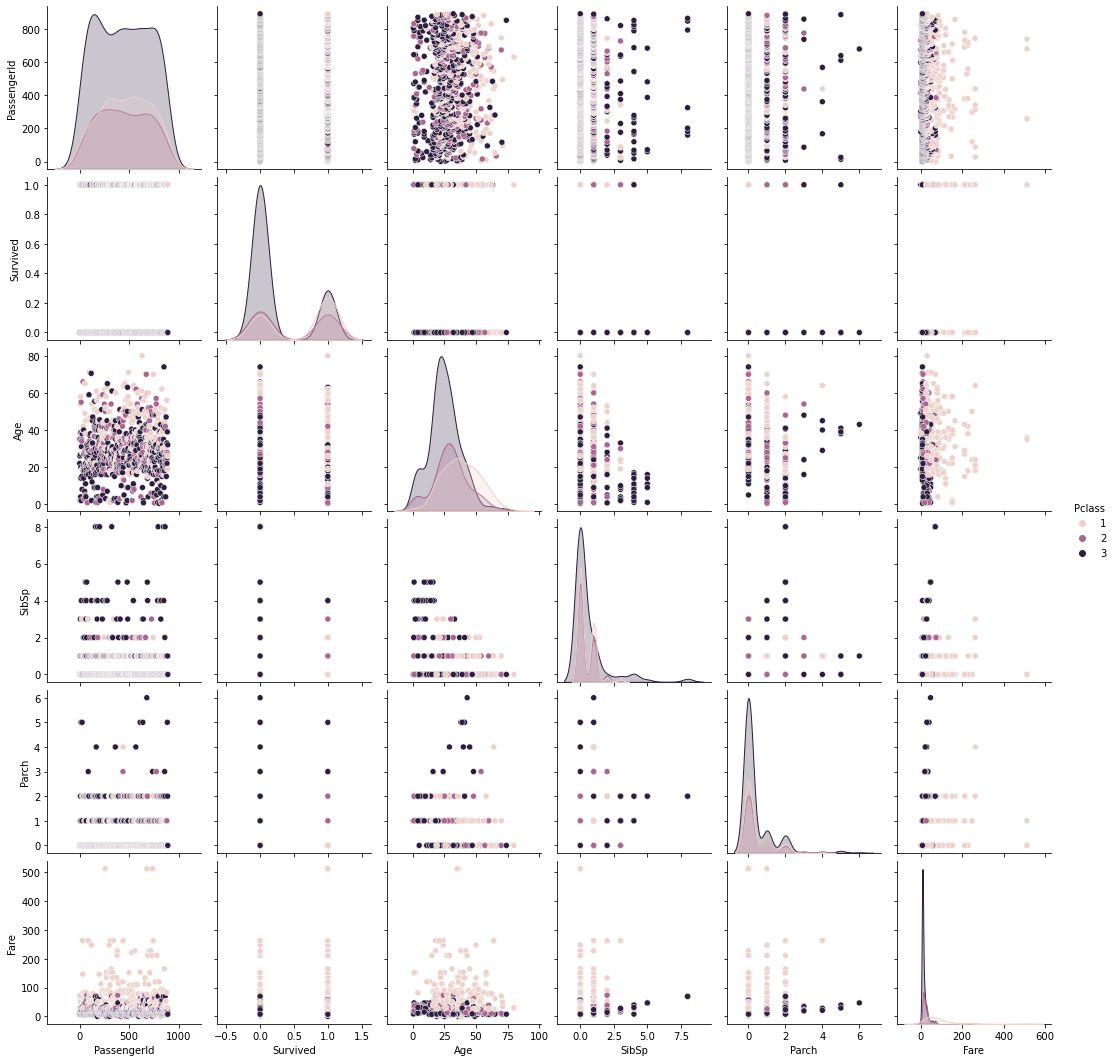

In [11]:
sns.pairplot(train_data,hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

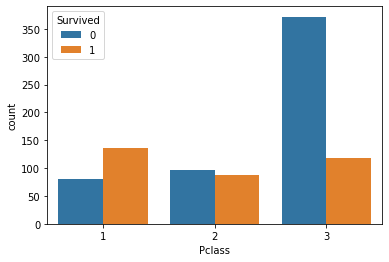

In [12]:
sns.countplot(x='Pclass',data=train_data,hue='Survived')

In [13]:
class_1=train_data.loc[train_data.Pclass == 1]['Survived']
cl_1=sum(class_1)/len(class_1)
class_1=train_data.loc[train_data.Pclass == 2]['Survived']
cl_2=sum(class_1)/len(class_1)
class_3=train_data.loc[train_data.Pclass == 3]['Survived']
cl_3=sum(class_1)/len(class_1)
print('Survival rate of class_1 is :', cl_1*100,'%')
print('Survival rate of class_2 is :', cl_2*100,'%')
print('Survival rate of class_3 is :', cl_3*100,'%')

Survival rate of class_1 is : 62.96296296296296 %
Survival rate of class_2 is : 47.28260869565217 %
Survival rate of class_3 is : 47.28260869565217 %


<AxesSubplot:xlabel='Embarked', ylabel='count'>

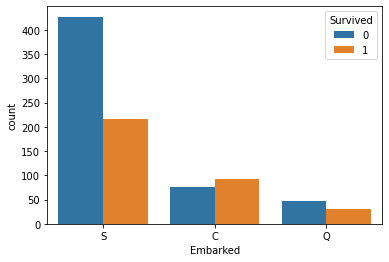

In [14]:
sns.countplot(x='Embarked',data=train_data,hue='Survived')

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Droping unnecessay column from data fram like passengerID , Name , Ticket

In [16]:
train_data=train_data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Dealing with null value


In [17]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

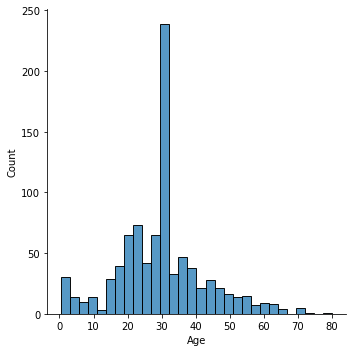

In [18]:
train_data['Age'].fillna(np.mean(train_data['Age']),inplace=True)
train_data['Embarked'].fillna('C',inplace=True)
train_data.isnull().sum()
sns.displot(train_data['Age'])

### Feature selection

In [19]:
import statsmodels.api as sm

In [20]:
x=train_data['Age']
x=sm.add_constant(x)
y=train_data['Survived']

In [21]:
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.663456
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                0.003688
Time:                        11:30:52   Log-Likelihood:                -591.14
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                   0.03643
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1433      0.172     -0.832      0.405      -0.481       0.194
Age           -0.0112      0.005     -2.077      0.038      -0.022      -0.001
==============================================================================
"""

as you can see hear coef if age = -0.0112 this imples that increase in age decresrs the the probability of surviving . i.e incearse in one unit of age deacrese the probability of surving by 0.0112  and as p value is greater than z staticts than we can reject the null hypothesis and their is relation between the age and dependent variable

In [22]:
x=train_data['Fare']
x=sm.add_constant(x)
y=train_data['Survived']
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                 0.05822
Time:                        11:30:52   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9413      0.095     -9.895      0.000      -1.128      -0.755
Fare           0.0152      0.002      6.809      0.000       0.011       0.020
==============================================================================
"""

In [23]:
x=train_data['Pclass']
x=sm.add_constant(x)
y=train_data['Survived']
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                 0.08617
Time:                        11:30:52   Log-Likelihood:                -542.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.885e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4468      0.207      6.975      0.000       1.040       1.853
Pclass        -0.8501      0.087     -9.755      0.000      -1.021      -0.679
==============================================================================
"""

In [24]:
x=train_data['SibSp']
x=sm.add_constant(x)
y=train_data['Survived']
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.665272
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:               0.0009611
Time:                        11:30:52   Log-Likelihood:                -592.76
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                    0.2856
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4382      0.076     -5.744      0.000      -0.588      -0.289
SibSp         -0.0686      0.065     -1.050      0.294      -0.197       0.060
==============================================================================
"""

As P value is greater than 0.05 we will not select this featre thre is no realtion between SibSp and dependent variable Survived

In [25]:
train_data=train_data.drop(['SibSp'],axis=1)

In [26]:
x=train_data['Parch']
x=sm.add_constant(x)
y=train_data['Survived']
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.662650
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                0.004899
Time:                        11:30:52   Log-Likelihood:                -590.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                   0.01590
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5531      0.077     -7.192      0.000      -0.704      -0.402
Parch          0.2033      0.085      2.403      0.016       0.037       0.369
==============================================================================
"""

### Converting classification data into numerical data

In [27]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.compose import make_column_transformer 

In [28]:
x_train=train_data.iloc[:,1:].values
x_train

array([[3, 'male', 22.0, 0, 7.25, 'S'],
       [1, 'female', 38.0, 0, 71.2833, 'C'],
       [3, 'female', 26.0, 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, 2, 23.45, 'S'],
       [1, 'male', 26.0, 0, 30.0, 'C'],
       [3, 'male', 32.0, 0, 7.75, 'Q']], dtype=object)

In [29]:
encode=LabelEncoder()
x_train[:,1]=encode.fit_transform(x_train[:,1])
x_train[:,-1]=encode.fit_transform(x_train[:,-1])
x_train

array([[3, 1, 22.0, 0, 7.25, 2],
       [1, 0, 38.0, 0, 71.2833, 0],
       [3, 0, 26.0, 0, 7.925, 2],
       ...,
       [3, 0, 29.69911764705882, 2, 23.45, 2],
       [1, 1, 26.0, 0, 30.0, 0],
       [3, 1, 32.0, 0, 7.75, 1]], dtype=object)

In [30]:
column_trans=make_column_transformer((OneHotEncoder(),[1,5]),remainder='passthrough')
x_train=column_trans.fit_transform(x_train)
x_train

array([[0.0, 1.0, 0.0, ..., 22.0, 0, 7.25],
       [1.0, 0.0, 1.0, ..., 38.0, 0, 71.2833],
       [1.0, 0.0, 0.0, ..., 26.0, 0, 7.925],
       ...,
       [1.0, 0.0, 0.0, ..., 29.69911764705882, 2, 23.45],
       [0.0, 1.0, 1.0, ..., 26.0, 0, 30.0],
       [0.0, 1.0, 0.0, ..., 32.0, 0, 7.75]], dtype=object)

### We need to scale the feature

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)

In [33]:
y_train=train_data.iloc[:,0].values

### Data cleaning for test data

In [34]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
x_test=test_data.drop(['PassengerId','Name','SibSp','Ticket','Cabin'],axis=1)

In [36]:
x_test

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,0,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,NaN,0,8.0500,S
414,1,female,39.0,0,108.9000,C
415,3,male,38.5,0,7.2500,S
416,3,male,NaN,0,8.0500,S


In [37]:
x_test.isnull().sum()

Pclass       0
Sex          0
Age         86
Parch        0
Fare         1
Embarked     0
dtype: int64

In [38]:
x_test['Age'].fillna(np.mean(x_test['Age']),inplace=True)
x_test['Fare'].fillna(np.mean(x_test['Fare']),inplace=True)

In [39]:
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
x_test['Sex']=encode.fit_transform(x_test['Sex'])
x_test['Embarked']=encode.fit_transform(x_test['Embarked'])

In [41]:
x_test=x_test.values

In [42]:
column_trans=make_column_transformer((OneHotEncoder(),[1,5]),remainder='passthrough')
x_test=column_trans.fit_transform(x_test)

In [43]:
x_test=scale.fit_transform(x_test)

In [44]:
x_test

array([[-7.55928946e-01,  7.55928946e-01, -5.68141541e-01, ...,
         3.34992599e-01, -4.00247702e-01, -4.98407056e-01],
       [ 1.32287566e+00, -1.32287566e+00, -5.68141541e-01, ...,
         1.32553003e+00, -4.00247702e-01, -5.13274288e-01],
       [-7.55928946e-01,  7.55928946e-01, -5.68141541e-01, ...,
         2.51417495e+00, -4.00247702e-01, -4.65088464e-01],
       ...,
       [-7.55928946e-01,  7.55928946e-01, -5.68141541e-01, ...,
         6.51964577e-01, -4.00247702e-01, -5.08791885e-01],
       [-7.55928946e-01,  7.55928946e-01, -5.68141541e-01, ...,
        -2.53374904e-15, -4.00247702e-01, -4.94448198e-01],
       [-7.55928946e-01,  7.55928946e-01,  1.76012477e+00, ...,
        -2.53374904e-15,  6.19895831e-01, -2.37905978e-01]])

In [45]:
x_train

array([[-7.37695132e-01,  7.37695132e-01, -4.85575570e-01, ...,
        -5.92480600e-01, -4.73673609e-01, -5.02445171e-01],
       [ 1.35557354e+00, -1.35557354e+00,  2.05941168e+00, ...,
         6.38789012e-01, -4.73673609e-01,  7.86845294e-01],
       [ 1.35557354e+00, -1.35557354e+00, -4.85575570e-01, ...,
        -2.84663197e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 1.35557354e+00, -1.35557354e+00, -4.85575570e-01, ...,
         4.37434839e-15,  2.00893337e+00, -1.76263239e-01],
       [-7.37695132e-01,  7.37695132e-01,  2.05941168e+00, ...,
        -2.84663197e-01, -4.73673609e-01, -4.43810379e-02],
       [-7.37695132e-01,  7.37695132e-01, -4.85575570e-01, ...,
         1.77062908e-01, -4.73673609e-01, -4.92377828e-01]])

In [46]:
test_y_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
y_test=test_y_gender.drop(['PassengerId'],axis=1).values


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred=log_reg.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix , accuracy_score ,plot_confusion_matrix

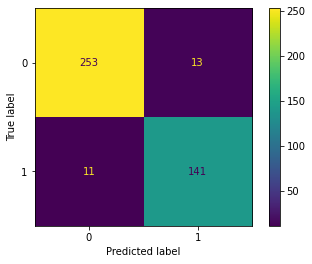

In [52]:
plot_confusion_matrix(log_reg,x_test,y_test)

In [53]:
log_reg.score(x_test,y_test)

0.9425837320574163

In [54]:
#submission=pd.DataFrame({"PassengerId": test_y_gender["PassengerId"],
                        #"Survived": y_pred})

In [55]:
#submission.to_csv('Titanic_Submission.csv', index=False)


In [56]:
import statsmodels.api as sm

In [57]:
model=sm.Logit(y_train,x_train).fit()
model.summary()

         Current function value: 0.475956
         Iterations: 35


C:\Users\wasim\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.2853
Time:                        11:31:00   Log-Likelihood:                -424.08
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.536e-70
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6465        nan        nan        nan         nan         nan
x2            -0.6466        nan        nan        nan         nan         nan
x3             0.1054        nan        nan        nan         nan         nan
x4             0.0259        nan        nan        nan         nan         nan
x5            -0.1088        nan        nan        nan         nan         nan
x6            -0.8525      0.115     -7.392      0.000      -1.079      -0.626
x7            -0.4338      0.095     -4.583      0.000      -0.619      -0.248
x8            -0.2126      0.092     -2.307      0.021      -0.393      -0.032
x9             0.1357      0.133      1.020      0.307      -0.125       0.396
==============================================================================
"""

### LDA using Gaussian distribution

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
model=GaussianNB()

In [60]:
model.fit(x_train,y_train)

GaussianNB()

In [61]:
model.score(x_train,y_train)

0.7811447811447811

In [62]:
y_pred=model.predict(x_test)

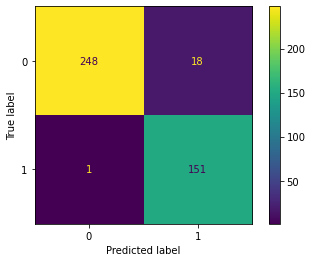

In [63]:
plot_confusion_matrix(model,x_test,y_test)

In [64]:
model.score(x_test,y_test)

0.9545454545454546

In [65]:
from sklearn.svm import SVC

In [66]:
model=SVC()

In [67]:
model.fit(x_train,y_train)

SVC()

In [68]:
model.score(x_train,y_train)

0.8316498316498316

In [69]:
y_pred=model.predict(x_test)

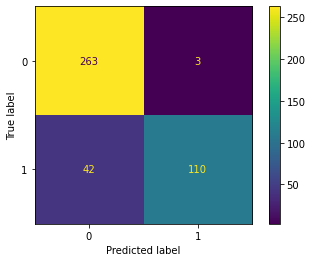

In [70]:
plot_confusion_matrix(model,x_test,y_test)

In [71]:
model.score(x_test,y_test)

0.8923444976076556

In [72]:
from sklearn.naive_bayes import BernoulliNB

In [73]:
model=BernoulliNB()

In [74]:
model.fit(x_train,y_train)

BernoulliNB()

In [75]:
y_pred=model.predict(x_test)

In [76]:
model.score(x_test,y_test)

0.9521531100478469

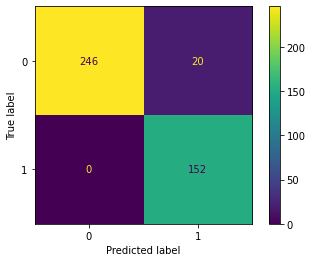

In [77]:
plot_confusion_matrix(model,x_test,y_test)

In [78]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))